## Predict students' dropout and academic success
#### A collection of data sourced from various separate databases within a higher education institution focuses on students enrolled in various undergraduate programs like agronomy, design, education, nursing, journalism, management, social service, and technologies. This dataset comprises details available at the point of student enrollment, encompassing academic paths, demographic information, socio-economic factors, along with academic performance records at the conclusion of the initial and subsequent semesters.

**Hypothesis**: A certain demographic, academic performance, and socio-economic factors may significantly influence both dropout rates and academic success.<br>
**Scientific method**: Leveraging classification techniques will help predict these outcomes accurately.<br>
**Objective**: Aim to find the most influential 3-5 features contirbuting to these predictions.

Dataset source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success <br>
Github: https://github.com/Henry-0810/Data-Analysis/tree/main/Project

In [84]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

In [85]:
student_dropout = pd.read_csv('data.csv', sep=';')
student_dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Cleaning
##### The data cleaning process is performed by the 4 creators of this dataset, which are Valentino Realinho, Mónica Vieira Martins, Jorge Machado, Luís Baptista.
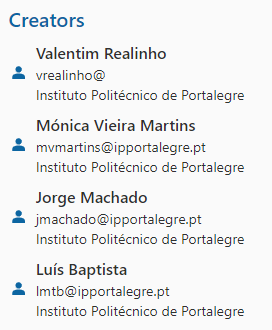<br>
A thorough data prepocessing has been performed by them to handle anomalies, unexplanable outliers and missing values. Therefore, the data cleaning process is already done by the creators.

In [86]:
# Spell checking
student_dropout.rename(columns={"Nacionality":"Nationality", "Daytime/evening attendance\t":"Daytime/Evening attendance"})

,Marital status,Application mode,Application order,Course,Daytime/Evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Selection and Data Understanding
#### I explored several websites to understand which aspects might have a stronger influence on the outcome. After going through these sources, I formed a hypothesis about which features could be more important compared to others.

Here are a few of my conclusion after reading form the sources I found:
- Grades
- Unemployment rate
- Course

<p>
Realizing that my own conclusion or idea might not be completely unbiased, I chose to use a random forest analysis to figure out which features are more important.</p>

**Sources:**
1. https://www.hindawi.com/journals/edri/2023/7704142/#conclusion-and-limitations 
2. https://www.frontiersin.org/articles/10.3389/feduc.2023.1159864/full


#### Random Forest Classifier
The code utilizes the RandomForestClassifier from scikit-learn to analyze feature importances within the studentDropout dataset.Here I chose the top 15 highest features in the result.
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Sepearate predictors (X) and target variable (y)
X = student_dropout.drop(columns='Target')
y = student_dropout['Target']

rf = RandomForestClassifier().fit(X,y)

# get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# get top 15
feature_importances = feature_importances.head(15)
print(feature_importances)

# filter out columns that are not in the top 15 in the student_dropout dataset
columns_filtered = feature_importances['Feature'].tolist()
columns_filtered.append('Target')
student_dropout_top15 = student_dropout[columns_filtered]
student_dropout_top15

                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.150844
31        Curricular units 2nd sem (grade)    0.099648
24     Curricular units 1st sem (approved)    0.081621
25        Curricular units 1st sem (grade)    0.065877
12                         Admission grade    0.043069
16                 Tuition fees up to date    0.043024
29  Curricular units 2nd sem (evaluations)    0.040705
19                       Age at enrollment    0.038888
6           Previous qualification (grade)    0.038312
23  Curricular units 1st sem (evaluations)    0.034000
3                                   Course    0.032932
11                     Father's occupation    0.028093
10                     Mother's occupation    0.026241
28     Curricular units 2nd sem (enrolled)    0.023708
35                                     GDP    0.023483


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Admission grade,Tuition fees up to date,Curricular units 2nd sem (evaluations),Age at enrollment,Previous qualification (grade),Curricular units 1st sem (evaluations),Course,Father's occupation,Mother's occupation,Curricular units 2nd sem (enrolled),GDP,Target
0,0,0.000000,0,0.000000,127.3,1,0,20,122.0,0,171,9,5,0,1.74,Dropout
1,6,13.666667,6,14.000000,142.5,0,6,19,160.0,6,9254,3,3,6,0.79,Graduate
2,0,0.000000,0,0.000000,124.8,0,0,19,122.0,0,9070,9,9,6,1.74,Dropout
3,5,12.400000,6,13.428571,119.6,1,10,20,122.0,8,9773,3,5,6,-3.12,Graduate
4,6,13.000000,5,12.333333,141.5,1,6,45,100.0,9,8014,9,9,6,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,5,12.666667,5,13.600000,122.2,1,8,19,125.0,7,9773,4,5,6,-4.06,Graduate
4420,2,11.000000,6,12.000000,119.0,0,6,18,120.0,6,9773,9,9,6,2.02,Dropout
4421,1,13.500000,7,14.912500,149.5,1,9,30,154.0,8,9500,9,9,8,0.79,Dropout
4422,5,12.000000,5,13.800000,153.8,1,6,20,180.0,5,9147,4,7,5,-3.12,Graduate


#### Bar Plot(Count Plot)
The bar plot visualization demonstrates the imbalance within the dataset, showcasing varying numbers of instances across the classification categories. Considering the chosen data mining techniques
- decision tree
- random forest
- support vector machine (SVM)
- gradient boosting

strategies need to be implemented to address this imbalance. 

SMOTE(Synthetic Minority Over-sampling Technique) may be essential to ensure fair and accurate predictions across all categories. These methods aim to counteract the bias that certain algorithms might exhibit towards the majority class, promoting more balanced learning and prediction outcomes.


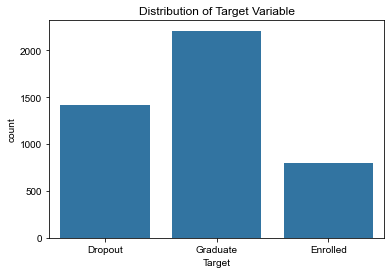

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if dataset is balance
sns.countplot(data=student_dropout_top15, x='Target')
plt.title('Distribution of Target Variable')
plt.show()

#### Heat Map (Correlation Matrix)
This visualization shows the correlation between numerical features. This helps to identify which features are more related to each other.
The results shows that the grades columns(e.g. Curricular units 2nd sem, Curricular units 1st sem, etc) are highly correlated, which means grades are related with each other. Multiple correlated columns would cause redundancy, therefore Principal Component Analysis(PCA) can be used to reduce the dimensionality while retaining the more important information. After carefully evaulating the impact of using PCA with mentor, it seems redundant to perform as it would cluster up the features and make it difficult to identify important features.

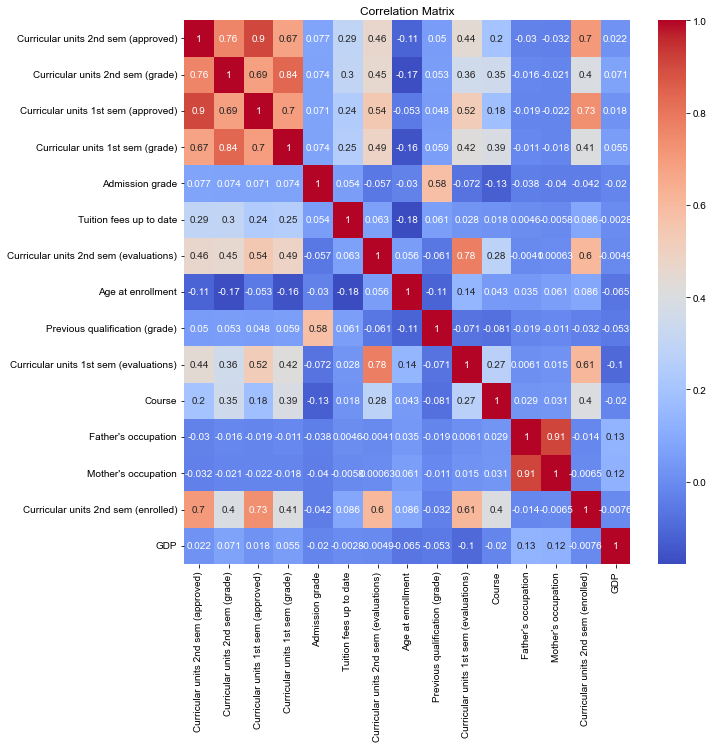

In [89]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(student_dropout_top15.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### A data visualization for feature importance
I plotted a feature importance graph against the target variable (Academic success/Dropout) to improve visualization 

C:\Users\hp\AppData\Local\Temp\ipykernel_10208\1719343104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='rocket')


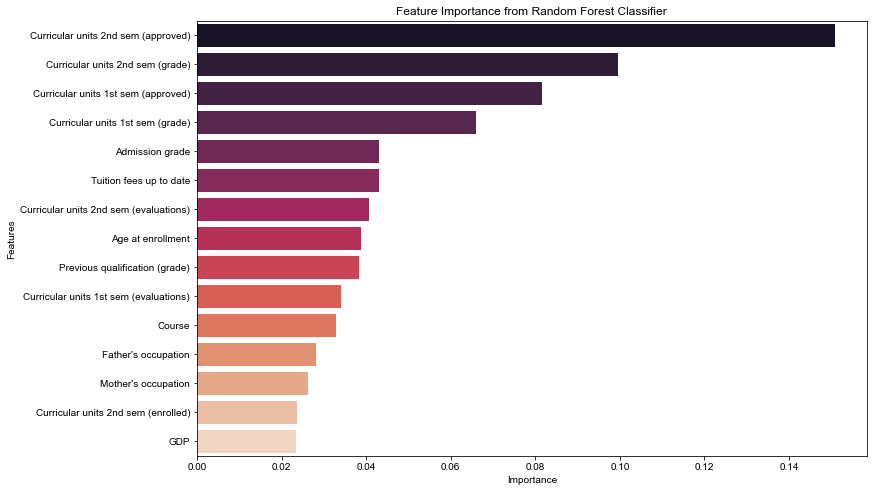

In [90]:
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='rocket')

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Classifier')

plt.show()

**Conclusion on feature importance**:<br>
Based on the graph above, it appears that the top 5 features are:
- Grades
- Age at enrollment
- Deadline for tuition fees payment
- Course
- Parent's occupation

This implies that while certain anticipated factors, such as unemployment rate, didn't rank among the top 5, the remaining aspects hold considerable significance in the dataset.

## Data Transformation
#### After carefully weighing the complexity and dimensionality of the data, I chose label encoding for the target column as it is categorical (Graduate/Dropout). I decided against using one-hot encoding because it would make the data much more complex, creating a lot of new columns, which could make it tough to analyze and find patterns during data mining.

**Sources:**
1. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/#:~:text=Label%20encoding%20is%20simpler%20and,lead%20to%20high%2Ddimensional%20data.
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
 

In [91]:
from sklearn.preprocessing import LabelEncoder

X = student_dropout_top15.drop(columns='Target')
y = student_dropout_top15['Target']

# perform label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# show numeric representation
label_categories = label_encoder.classes_
print(label_categories)

['Dropout' 'Enrolled' 'Graduate']


#### Train Test Split
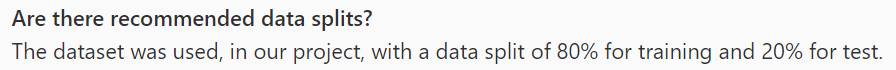<br>
It was reccommended by the creators that train test split should be 2:8

The SMOTE(Synthetic Minority Over-sampling Technique) is used because the dataset is slightly imbalance.

In [92]:
from sklearn.model_selection import train_test_split
# run this in python env - pip install -U imbalanced-learn
# run this in conda env - conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
smote = SMOTE(random_state=1)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Data Mining
##### I planned to use two techniques to determine which algorithm/method has more accuracy.
- Decision Tree Classifier
- Support Vector Machine(SVM)
- Random Forest Classifier
- Gradient Boosting

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: ", dt_accuracy)

Decision Tree Accuracy:  0.6983050847457627


#### Support Vector Machine

In [94]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM without PCA Accuracy:", svm_accuracy)

SVM without PCA Accuracy: 0.7559322033898305


#### Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy: ", rf_accuracy)

Accuracy:  0.7728813559322034


#### Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)
predictions = gradient_boosting.predict(X_test)
gb_accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", gb_accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.7785310734463277
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       274
           1       0.58      0.40      0.47       167
           2       0.80      0.94      0.86       444

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.71       885
weighted avg       0.77      0.78      0.77       885

Confusion Matrix:
[[205  32  37]
 [ 33  66  68]
 [ 10  16 418]]


#### Utilizing the restructured training data in the top-performing algorithms due to the identified dataset imbalance.
1. Random Forest Classifier
2. Gradient Boosting

#### Random Forest Classifier with resampled train data

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy_resampled = accuracy_score(y_test, rf_predictions)
print("Accuracy: ", rf_accuracy_resampled)

Accuracy:  0.7717514124293785


#### Gradient Boosting with resampled train data

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train_resampled, y_train_resampled)
predictions = gradient_boosting.predict(X_test)
gb_accuracy_resampled = accuracy_score(y_test, predictions)

print("Accuracy:", gb_accuracy_resampled)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.7762711864406779
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       274
           1       0.53      0.59      0.56       167
           2       0.85      0.90      0.87       444

    accuracy                           0.78       885
   macro avg       0.74      0.73      0.73       885
weighted avg       0.78      0.78      0.78       885

Confusion Matrix:
[[189  56  29]
 [ 24  99  44]
 [ 12  33 399]]


#### Evaluation of Top 2 Algorithms with resampled data

**Accuracy**<br>
When employing the top two algorithms(Random Forest, Gradient Boosting) on the resampled dataset using `x_train_resampled`, it was observed that the accuracy only exhibited a slight decrease. This decrement appeared to be inconsequential despite the dataset's inherent imbalance.

**Classification Report(Gradient Boosting)**<br>
Before resampling, the accuracy, macro average, and weighted average stood at 78%, 73%, and 77%, respectively.<br>
After resampling (SMOTE), these attributes remained nearly unchanged, with only the weighted average experiencing a 1% increase compared to the pre-resampling results. This indicates a consistent distribution of instances/classes within the dataset, despite the imbalanced representation shown in the count plot above.

## Pattern Evaluation
##### Area Under the curve (AUC) and bias, variance trade-off using cross validation using the best performed algorithm:
**Gradient Boosting Classifier**

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# Calculate AUC on the test set
y_prediction_proba = gradient_boosting.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prediction_proba, multi_class='ovr') # one-versus-rest
print("Area Under the Curve (AUC):", auc)

# Evaluate bias and variance trade-off using cross-validation
cv_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-validation Mean Score:", mean_cv_score)
print("Cross-validation Standard Deviation:", std_cv_score)

Area Under the Curve (AUC): 0.8930678746653662
Cross-validation Mean Score: 0.7714041985312332
Cross-validation Standard Deviation: 0.004138859522391253


**Area Under the Curve (AUC)**: 
The AUC score of 0.878 indicates that the model performs relatively well in distinguishing between different classes. An AUC closer to 1 suggests better discrimination ability.

**Cross-validation Mean Score**: 
The mean cross-validation score of approximately 0.771 reflects the average performance of the model across different subsets of the data. It suggests that, on average, the model's predictive accuracy or performance is around 77.1%.

**Cross-validation Standard Deviation**: The standard deviation of 0.004 implies the degree of variability or spread in the cross-validation scores around the mean. A lower standard deviation indicates less variability and greater consistency in model performance across folds.

##### Conclusion:
The model demonstrates a good discriminatory ability between classes based on the AUC score. However, while the average accuracy is relatively high at around 77.1%, it's crucial to consider the variability indicated by the standard deviation. The consistency of performance across different subsets might vary. Overall, the model shows promising performance, but further improvements might be needed to address variability and enhance overall accuracy.

##### Sensitivity around the mean

In [100]:
y_true_mean = np.mean(y_test)

sensitivity = np.mean(np.abs(y_prediction_proba - y_true_mean))
print("Sensitivity around the mean: ", sensitivity)

Sensitivity around the mean:  0.8587570621468926


(Kenton, 2023) Sensitivity around the mean is a measure indicating the model's performance in correctly predicting positive instances concerning the mean value across all classes. A sensitivity score of approximately 0.86 suggests that the model has a relatively good ability to identify positive instances across the classes, indicating a robust prediction capability.

## Knowledge Presentation

From the conclusion of data selection using random forest's feature importances, the top 3 biggest impact on student's dropout and academic success rate are:
- Grades
- Age at enrollment
- Course

Here is a bar plot that shows features and the distribution of each category within the target class:


**Scatter plot for Grades against the target variable**

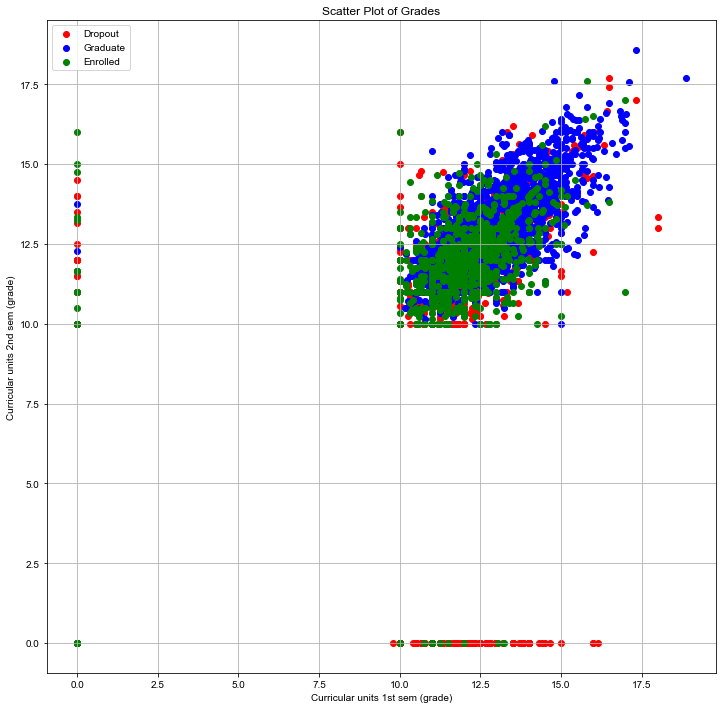

In [101]:
colors = {'Dropout': 'red', 'Graduate': 'blue', 'Enrolled': 'green'}

# Plotting the scatter plot
plt.figure(figsize=(12, 12))
for target_class, color in colors.items():
    subset = student_dropout_top15[student_dropout_top15['Target'] == target_class]
    plt.scatter(subset['Curricular units 1st sem (grade)'], subset['Curricular units 2nd sem (grade)'], c=color, label=target_class)

plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.legend()
plt.title('Scatter Plot of Grades')
plt.grid(True)
plt.show()


This graph shows that most students with 0.0 grade on 2nd semester are more likely to dropout. While certain scenarios, a significant amount of students dropout carrying a high grade in 1st and 2nd semester. Overall, it shows that students with higher grades are most likely to achieve academic success. 

**Bar plot for Age at enrollment against the target variable**

C:\Users\hp\AppData\Local\Temp\ipykernel_10208\2480559811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_dropout_top15['Age Range'] = pd.cut(student_dropout_top15['Age at enrollment'], bins=bins, labels=labels)


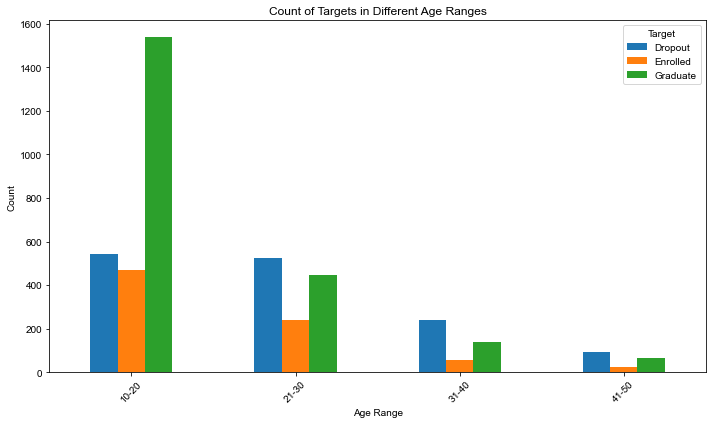

In [102]:
bins = [10, 20, 30, 40, 50]  # Define age ranges
labels = ['10-20', '21-30', '31-40', '41-50']  # Labels for age ranges
student_dropout_top15['Age Range'] = pd.cut(student_dropout_top15['Age at enrollment'], bins=bins, labels=labels)

# Counting occurrences of each target category within age ranges
age_target_counts = student_dropout_top15.groupby(['Age Range', 'Target']).size().unstack(fill_value=0)

# Plotting the bar chart
age_target_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Targets in Different Age Ranges')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that most student graduate and dropout at the age of 10-20.

**Accuracy for each algorithm**

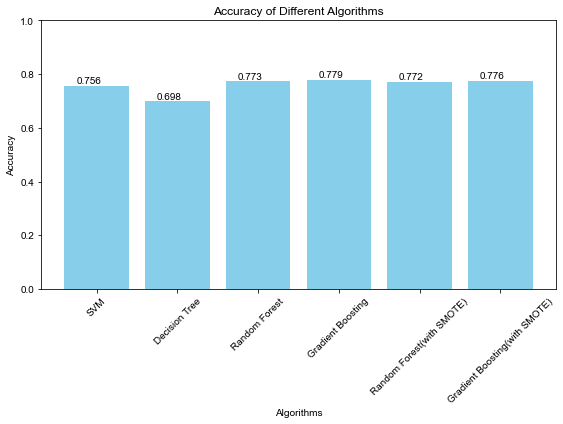

In [103]:
algorithms = ['SVM', 'Decision Tree','Random Forest','Gradient Boosting','Random Forest(with SMOTE)', 'Gradient Boosting(with SMOTE)']
accuracies = [svm_accuracy, dt_accuracy, rf_accuracy, gb_accuracy, rf_accuracy_resampled, gb_accuracy_resampled ]
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, accuracies, color='skyblue')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center', color='black')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gradient boosting and random forest outperform both SVM and Decision tree in predictive accuracy. 

**ROC(Receiver Operating Characteristics) Curve**<br>
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds

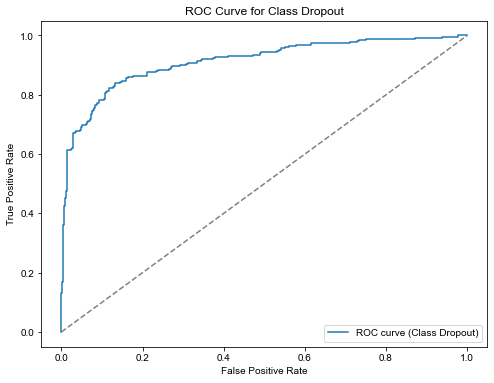

In [111]:
from sklearn.metrics import roc_curve

class_index = 0 #dropout

y_score_dropout = gradient_boosting.predict_proba(X_test)[:, class_index]
fpr, tpr, thresholds = roc_curve((y_test == class_index).astype(int), y_score_dropout)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (Class Dropout)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class Dropout')
plt.legend(loc='lower right')
plt.show()


The area under the ROC curve (AUC) is a measure of the overall performance of the classifier. In this case, the AUC is approximately 0.8, which is a good result. This means that the classifier is able to correctly identify a high percentage of true positives while keeping the false positive rate low.

**Cross-validation Scores**

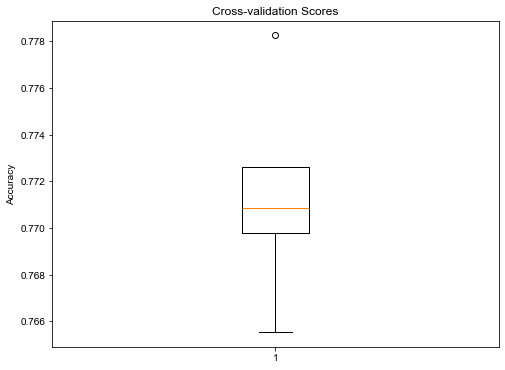

In [114]:
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-validation Scores')
plt.ylabel('Accuracy')
plt.show()

## Reference:
1. Quiles, O. L., Galdón-López, S., & Lendínez-Turón, A. (2023). Dropout at university. Variables involved on it. Frontiers in Education, 8. https://doi.org/10.3389/feduc.2023.1159864
2. Nurmalitasari, Long, Z.A. and Noor, M.F.M., 2023. Factors influencing dropout students in higher education. Education Research International, [online] 2023, pp.1–13. https://doi.org/10.1155/2023/7704142.
3. Kenton, W., 2023. Sensitivity Analysis Definition. [online] Investopedia. Available at: <https://www.investopedia.com/terms/s/sensitivityanalysis.asp>.